 <h1><center> <font color='green'>CNN  Basado en TL Inception V3 </font></center></h1> 

 <h1><center> <font color='blue'>Librerías</font></center></h1> 


In [1]:
pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
"""Importar librerias para realizar CNN"""
import os
"""Cargar las imagenes"""
import cv2
from PIL import Image
"""Tensoflow para las redes neuronales"""
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
"""Librería para calculo numerico"""
import numpy as np
"""Libreria para graficas"""
import matplotlib.pyplot as plt
"""Importa para dividir el conjunto de datos en entrenamiento y prueba"""
from sklearn.model_selection import train_test_split
"""Librería que que ofrece metricas"""
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
"""Importa datos de señales de registro de archivos de ejecuciones
de simulación disponibles para la aplicación en tiempo real seleccionadas"""
import time
import math
import logging

<h1><center> <font color='orange'>Carga y exploración de datos</font></center></h1> 

In [28]:
"""Definición del tamaño, array de las imagenes"""
IMG_SHAPE  = 224
batch_size = 32
random_seed = 9

In [29]:
# Carga de datos
fpath = './DataSetClasificado_Recortado'
categories = os.listdir(fpath)
print("List of categories = ", categories, "\n\nNo. of categories = ", len(categories))

List of categories =  ['FASE 0', 'FASE 1', 'FASE 2', 'FASE 3', 'FASE 4', 'FASE 5', 'FASE 6'] 

No. of categories =  7


In [30]:
"""Funcion para cargar las imagenes por categorias"""
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath+"/"+category):
            img = cv2.imread(fpath+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img_array = Image.fromarray(img, 'RGB')

            img_lst.append(np.array(img_array))

            labels.append(index)
    return img_lst, labels
"""Cargar las imagenes desde las categorias"""
images, labels = load_images_and_labels(categories)
"""Mostrar la cantidad de imagenes cargadas"""
print("Nº de imágenes cargadas = ",len(images),"\nNo. de etiquetas cargadas = ",len(labels))
print(type(images),type(labels))

Nº de imágenes cargadas =  1120 
No. de etiquetas cargadas =  1120
<class 'list'> <class 'list'>


In [31]:
"""Variables para ver el array de las imagenes y los label"""
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (1120, 224, 224, 3) 
Labels shape =  (1120,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


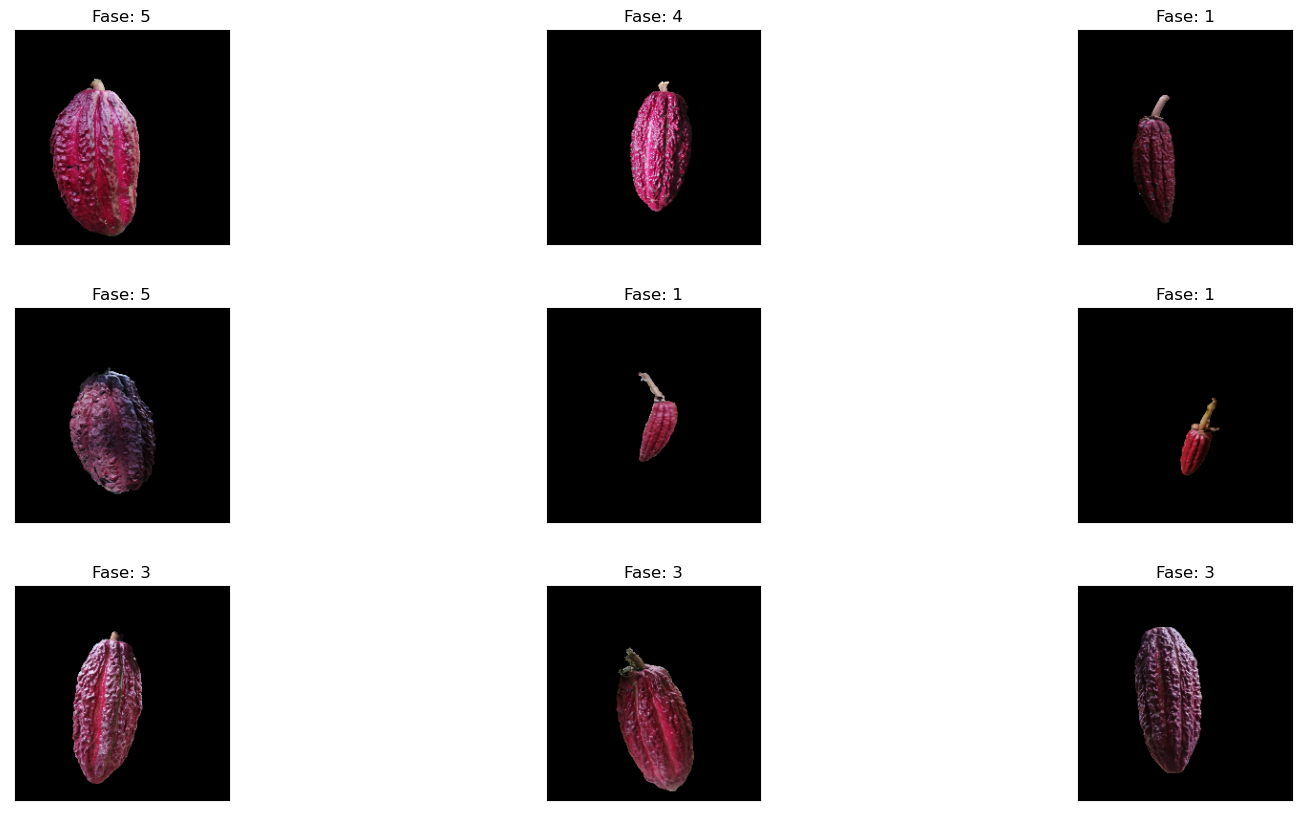

In [32]:
"""Función para visualizar imagenes aleatorias """
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
 
        plt.title('Fase: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
"""Mostrar imagenes con sus labels"""
display_rand_images(images, labels)

# TEST

In [33]:
"""Definición del tamaño, array de las imagenes"""
IMG_SHAPE  = 224
batch_size = 32
random_seed = 9

In [34]:
# Carpeta de prueba
test_folder = './DataSet_Test'
# Categorías de prueba
categories_test = os.listdir(fpath_test)
print("List of categories (test) =", categories_test, "\n\nNo. of categories =", len(categories_test))

List of categories (test) = ['FASE 0', 'FASE 1', 'FASE 2', 'FASE 3', 'FASE 4', 'FASE 5', 'FASE 6'] 

No. of categories = 7


In [35]:
"""Funcion para cargar las imagenes de prueba"""
def load_test_images(categories):
    img_lst = []
    labels = []
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath_test+"/"+category):
            img = cv2.imread(fpath_test+"/"+category+"/"+image_name)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (IMG_SHAPE, IMG_SHAPE))
            img_array = Image.fromarray(img, 'RGB')
            img_lst.append(np.array(img_array))
            labels.append(index)
    return img_lst, labels

"""Cargar las imagenes de prueba desde las categorias de prueba"""
test_images, test_labels = load_test_images(categories_test)

"""Mostrar la cantidad de imagenes de prueba cargadas"""
print("Nº de imágenes de prueba cargadas =", len(test_images), "\nNo. de etiquetas de prueba cargadas =", len(test_labels))
print(type(test_images), type(test_labels))

Nº de imágenes de prueba cargadas = 280 
No. de etiquetas de prueba cargadas = 280
<class 'list'> <class 'list'>


In [36]:
"""Variables para ver el array de las imagenes de prueba y los label"""
test_images = np.array(test_images)
test_labels = np.array(test_labels)

print("Test images shape =", test_images.shape, "\nTest labels shape =", test_labels.shape)
print(type(test_images), type(test_labels))

Test images shape = (280, 224, 224, 3) 
Test labels shape = (280,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


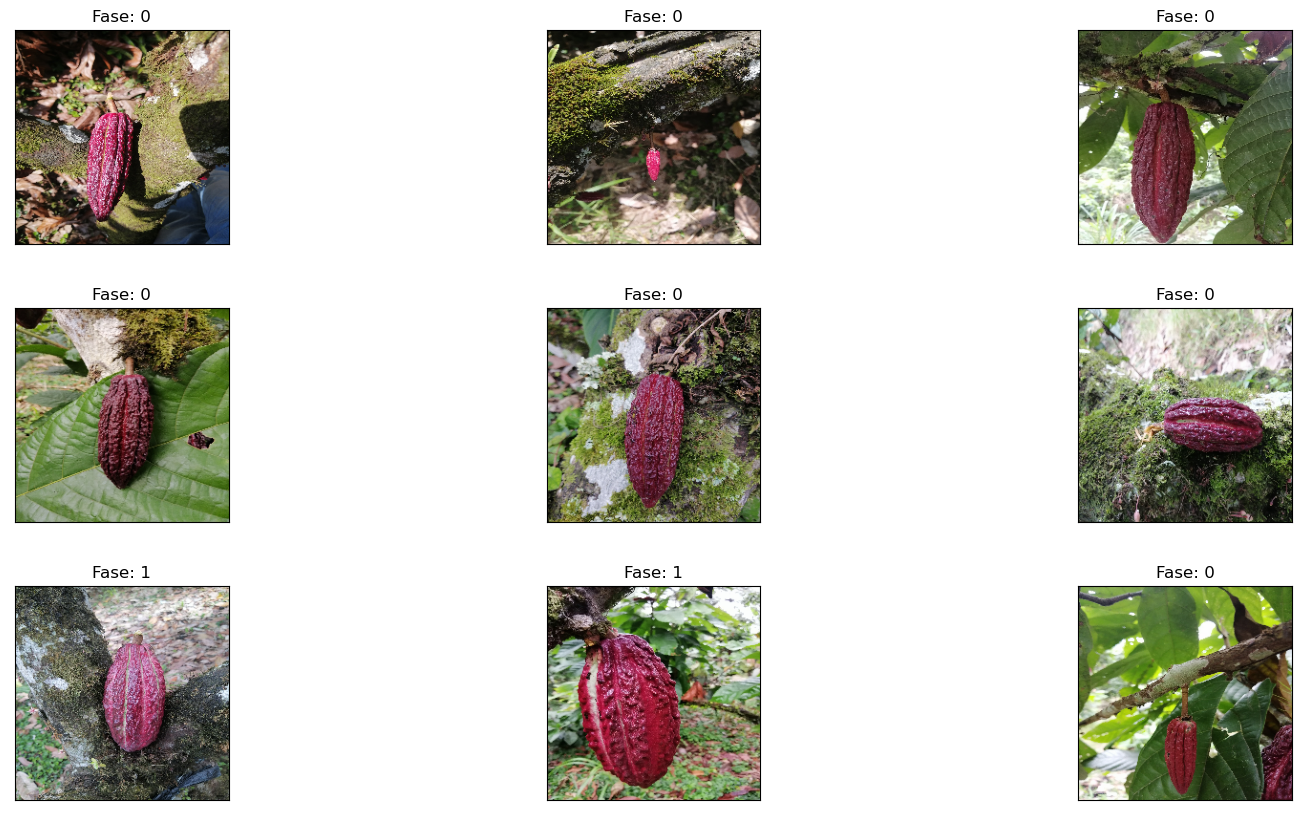

In [41]:

# Función para visualizar imagenes aleatorias
def display_rand_images(test_images, test_labels):
    plt.figure(1, figsize=(19, 10))
    n = 0
    for i in range(9):
        n += 1
        r = np.random.randint(0, test_images.shape[0], 1)
        
        plt.subplot(3, 3, n)
        plt.subplots_adjust(hspace=0.3, wspace=0.3)
        plt.imshow(test_images[r[0]])
        plt.title('Fase: {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

# Mostrar imagenes con sus labels
display_rand_images(test_images, test_labels)

<h1>Definición del conjunto de datos para pruebas y entrenamiento

In [42]:
"""Primero se reorganizan los datos"""

"""Obtener números igualmente espaciados en un rango dado"""
n = np.arange(images.shape[0])
print("'n' values before shuffling = ",n)

"""Mezclar todos los valores igualmente espaciados en la lista 'n'"""
np.random.seed(random_seed)
np.random.shuffle(n)
print("\n'n' values after shuffling = ",n)

'n' values before shuffling =  [   0    1    2 ... 1117 1118 1119]

'n' values after shuffling =  [ 874 1071  650 ...  638  348  382]


In [43]:
"""El segundo paso es la mezcla de datos"""

"""imágenes aleatorias y datos de etiquetas correspondientes en ambas listas"""
images = images[n]
labels = labels[n]

print("Forma de las imágenes después de la mezcla = ",images.shape,"\nForma de las etiquetas después de mezclar= ",labels.shape)

Forma de las imágenes después de la mezcla =  (1120, 224, 224, 3) 
Forma de las etiquetas después de mezclar=  (1120,)


### Normalización

In [44]:
"""Normalizacion de los datos, segun su tipo: float, int"""
images = images.astype(np.float32)
labels = labels.astype(np.int32)
images = images/255
print("Forma de las imágenes después de la normalización = ",images.shape)

Forma de las imágenes después de la normalización =  (1120, 224, 224, 3)


### Training and Testing

In [46]:
'''Se divide el conjunto de datos en 80% para entrenamiento y 20% para prueba'''
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state = random_seed)

x_val = x_train[:58]
y_val = y_train[:58]
x_train = x_train[58:]
y_train = y_train[58:]

"""Mostrar los array en cada parte del entrenamiento y la prueba"""

print("x_train shape = ",x_train.shape)
print("y_train shape = ",y_train.shape)
print("\nx_test shape = ",x_test.shape)
print("y_test shape = ",y_test.shape)

print("\nx_val shape = ",x_val.shape)
print("y_val shape = ",y_val.shape)

x_train shape =  (838, 224, 224, 3)
y_train shape =  (838,)

x_test shape =  (224, 224, 224, 3)
y_test shape =  (224,)

x_val shape =  (58, 224, 224, 3)
y_val shape =  (58,)


In [47]:
"""Estructura One-hot-encode"""
y_train = to_categorical(y_train, 7)
y_test = to_categorical(y_test, 7)
y_val = to_categorical(y_val, 7)


 <h1><center> <font color='purple'>Implementación del modelo CNN Basado en TL Inception V3</font></center></h1> 

In [48]:
"""Función para el pre-entrenamiento del modelo, con InceptionV3"""
pre_trained_model = tf.keras.applications.inception_v3.InceptionV3(input_shape=x_train[0].shape, include_top=False, weights="imagenet")


In [49]:
"""Pre-entrenar el modelo por capas"""
for layer in pre_trained_model.layers:
    print(layer.name)
    layer.trainable = False

input_2
conv2d_94
batch_normalization_96
activation_94
conv2d_95
batch_normalization_97
activation_95
conv2d_96
batch_normalization_98
activation_96
max_pooling2d_4
conv2d_97
batch_normalization_99
activation_97
conv2d_98
batch_normalization_100
activation_98
max_pooling2d_5
conv2d_102
batch_normalization_104
activation_102
conv2d_100
conv2d_103
batch_normalization_102
batch_normalization_105
activation_100
activation_103
average_pooling2d_9
conv2d_99
conv2d_101
conv2d_104
conv2d_105
batch_normalization_101
batch_normalization_103
batch_normalization_106
batch_normalization_107
activation_99
activation_101
activation_104
activation_105
mixed0
conv2d_109
batch_normalization_111
activation_109
conv2d_107
conv2d_110
batch_normalization_109
batch_normalization_112
activation_107
activation_110
average_pooling2d_10
conv2d_106
conv2d_108
conv2d_111
conv2d_112
batch_normalization_108
batch_normalization_110
batch_normalization_113
batch_normalization_114
activation_106
activation_108
activati

# GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV,KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
def create_model(dropout_rate,units ):
  
  last_layer = pre_trained_model.get_layer('mixed10')
  last_output = last_layer.output
  x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
  x = tf.keras.layers.GlobalMaxPooling2D()(last_output)


  x = tf.keras.layers.Dense(units= units, activation='relu')(x)
  x = tf.keras.layers.Dense(units= units, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)

  x = tf.keras.layers.Dense(units= units, activation='relu')(x)
  x = tf.keras.layers.Dense(units= units, activation='relu')(x)
  x = tf.keras.layers.BatchNormalization()(x)
  x = tf.keras.layers.Dropout(dropout_rate)(x)


  x = tf.keras.layers.Dense(7, activation='softmax')(x)
  model_GridSearchCV = tf.keras.Model(pre_trained_model.input, x)
  """Configuracion para compilar el modelo, tambien se optimiza"""
  model_GridSearchCV.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])
  return model_GridSearchCV



model_GridSearchCV = KerasClassifier(build_fn = create_model)

C:\Users\Fabián\AppData\Local\Temp\ipykernel_1360\3877328018.py:32: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_GridSearchCV = KerasClassifier(build_fn = create_model)


In [69]:
batch_size = [32,40,64]
epochs = [25]
#learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.1,0.2,0.3,0.4,0.5]
#activation_function = ['softmax','relu','tanh','linear']
#init = ['uniform']
units = [512,1004,350,784,256,128]
neuron1 = [128,256]
neuron2 = [128,256]


param_grids = dict(batch_size = batch_size,epochs = epochs,dropout_rate = dropout_rate,
                   units = units)



grid = GridSearchCV(estimator = model_GridSearchCV,param_grid = param_grids,cv = 2,verbose = 1)
grid_result = grid.fit(x_train, y_train)

Fitting 2 folds for each of 90 candidates, totalling 180 fits
Epoch 1/25
14/14 [==============================] - 23s 1s/step - loss: 1.3866 - acc: 0.5704
Epoch 2/25
14/14 [==============================] - 17s 1s/step - loss: 0.6556 - acc: 0.7900
Epoch 3/25
14/14 [==============================] - 17s 1s/step - loss: 0.4002 - acc: 0.8520
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 0.3307 - acc: 0.8807
Epoch 5/25
14/14 [==============================] - 18s 1s/step - loss: 0.3281 - acc: 0.8783
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.3277 - acc: 0.8687
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.2737 - acc: 0.9117
Epoch 8/25
14/14 [==============================] - 17s 1s/step - loss: 0.1645 - acc: 0.9523
Epoch 9/25
14/14 [==============================] - 17s 1s/step - loss: 0.1226 - acc: 0.9618
Epoch 10/25
14/14 [==============================] - 17s 1s/step - loss: 0.1369 - acc: 0.9594
Epoch 1

14/14 [==============================] - 19s 1s/step - loss: 0.1485 - acc: 0.9618
Epoch 20/25
14/14 [==============================] - 19s 1s/step - loss: 0.1322 - acc: 0.9547
Epoch 21/25
14/14 [==============================] - 19s 1s/step - loss: 0.1530 - acc: 0.9547
Epoch 22/25
14/14 [==============================] - 19s 1s/step - loss: 0.1914 - acc: 0.9379
Epoch 23/25
14/14 [==============================] - 19s 1s/step - loss: 0.1496 - acc: 0.9547
Epoch 24/25
14/14 [==============================] - 19s 1s/step - loss: 0.0839 - acc: 0.9833
Epoch 25/25
14/14 [==============================] - 20s 1s/step - loss: 1.7241 - acc: 0.6229
Epoch 1/25
14/14 [==============================] - 26s 1s/step - loss: 1.4221 - acc: 0.5680
Epoch 2/25
14/14 [==============================] - 20s 1s/step - loss: 0.7896 - acc: 0.7542
Epoch 3/25
14/14 [==============================] - 24s 2s/step - loss: 0.4452 - acc: 0.8544
Epoch 4/25
14/14 [==============================] - 24s 2s/step - loss: 0.3

14/14 [==============================] - 17s 1s/step - loss: 0.6926 - acc: 0.7470
Epoch 4/25
14/14 [==============================] - 17s 1s/step - loss: 0.5729 - acc: 0.7995
Epoch 5/25
14/14 [==============================] - 17s 1s/step - loss: 0.4757 - acc: 0.8234
Epoch 6/25
14/14 [==============================] - 17s 1s/step - loss: 0.4093 - acc: 0.8783
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.3714 - acc: 0.8807
Epoch 8/25
14/14 [==============================] - 17s 1s/step - loss: 0.3669 - acc: 0.8807
Epoch 9/25
14/14 [==============================] - 17s 1s/step - loss: 0.2908 - acc: 0.8878
Epoch 10/25
14/14 [==============================] - 17s 1s/step - loss: 0.2421 - acc: 0.9260
Epoch 11/25
14/14 [==============================] - 17s 1s/step - loss: 0.1993 - acc: 0.9451
Epoch 12/25
14/14 [==============================] - 17s 1s/step - loss: 0.2663 - acc: 0.9117
Epoch 13/25
14/14 [==============================] - 17s 1s/step - loss: 0.217

14/14 [==============================] - 17s 1s/step - loss: 0.2065 - acc: 0.9260
Epoch 14/25
14/14 [==============================] - 17s 1s/step - loss: 0.1394 - acc: 0.9523
Epoch 15/25
14/14 [==============================] - 17s 1s/step - loss: 0.1677 - acc: 0.9427
Epoch 16/25
14/14 [==============================] - 17s 1s/step - loss: 0.1754 - acc: 0.9475
Epoch 17/25
14/14 [==============================] - 17s 1s/step - loss: 0.1652 - acc: 0.9427
Epoch 18/25
14/14 [==============================] - 17s 1s/step - loss: 0.2055 - acc: 0.9236
Epoch 19/25
14/14 [==============================] - 17s 1s/step - loss: 0.1543 - acc: 0.9499
Epoch 20/25
14/14 [==============================] - 17s 1s/step - loss: 0.0973 - acc: 0.9690
Epoch 21/25
14/14 [==============================] - 17s 1s/step - loss: 0.1112 - acc: 0.9594
Epoch 22/25
14/14 [==============================] - 17s 1s/step - loss: 0.1043 - acc: 0.9737
Epoch 23/25
14/14 [==============================] - 17s 1s/step - loss:

14/14 [==============================] - 17s 1s/step - loss: 0.3146 - acc: 0.8950
Epoch 7/25
14/14 [==============================] - 17s 1s/step - loss: 0.3148 - acc: 0.8783
Epoch 8/25
14/14 [==============================] - 17s 1s/step - loss: 0.2331 - acc: 0.9069
Epoch 9/25
14/14 [==============================] - 17s 1s/step - loss: 0.2661 - acc: 0.9069
Epoch 10/25
14/14 [==============================] - 17s 1s/step - loss: 0.1466 - acc: 0.9618
Epoch 11/25
14/14 [==============================] - 17s 1s/step - loss: 0.1584 - acc: 0.9570
Epoch 12/25
14/14 [==============================] - 17s 1s/step - loss: 0.1996 - acc: 0.9332
Epoch 13/25
14/14 [==============================] - 17s 1s/step - loss: 0.2036 - acc: 0.9403
Epoch 14/25
14/14 [==============================] - 17s 1s/step - loss: 0.2004 - acc: 0.9356
Epoch 15/25
14/14 [==============================] - 17s 1s/step - loss: 0.1917 - acc: 0.9260
Epoch 16/25
14/14 [==============================] - 17s 1s/step - loss: 0.

Epoch 16/25
14/14 [==============================] - 17s 1s/step - loss: 0.2829 - acc: 0.8950
Epoch 17/25
14/14 [==============================] - 17s 1s/step - loss: 0.2345 - acc: 0.9189
Epoch 18/25
14/14 [==============================] - 17s 1s/step - loss: 0.2541 - acc: 0.8902
Epoch 19/25
14/14 [==============================] - 17s 1s/step - loss: 0.2144 - acc: 0.9260
Epoch 20/25
14/14 [==============================] - 17s 1s/step - loss: 0.2504 - acc: 0.9117
Epoch 21/25
14/14 [==============================] - 17s 1s/step - loss: 0.2286 - acc: 0.9189
Epoch 22/25
14/14 [==============================] - 17s 1s/step - loss: 0.1786 - acc: 0.9427
Epoch 23/25
14/14 [==============================] - 17s 1s/step - loss: 0.1529 - acc: 0.9427
Epoch 24/25
14/14 [==============================] - 17s 1s/step - loss: 0.1582 - acc: 0.9499
Epoch 25/25
14/14 [==============================] - 18s 1s/step - loss: 0.7786 - acc: 0.7613
Epoch 1/25
14/14 [==============================] - 23s 1s/s

14/14 [==============================] - 16s 1s/step - loss: 0.1701 - acc: 0.9475
Epoch 10/25
14/14 [==============================] - 16s 1s/step - loss: 0.2089 - acc: 0.9284
Epoch 11/25
14/14 [==============================] - 16s 1s/step - loss: 0.2049 - acc: 0.9308
Epoch 12/25
14/14 [==============================] - 16s 1s/step - loss: 0.1817 - acc: 0.9356
Epoch 13/25
14/14 [==============================] - 16s 1s/step - loss: 0.1836 - acc: 0.9475
Epoch 14/25
14/14 [==============================] - 16s 1s/step - loss: 0.1428 - acc: 0.9427
Epoch 15/25
14/14 [==============================] - 16s 1s/step - loss: 0.2140 - acc: 0.9308
Epoch 16/25
14/14 [==============================] - 16s 1s/step - loss: 0.2031 - acc: 0.9332
Epoch 17/25
14/14 [==============================] - 16s 1s/step - loss: 0.1261 - acc: 0.9570
Epoch 18/25
14/14 [==============================] - 16s 1s/step - loss: 0.1616 - acc: 0.9523
Epoch 19/25
14/14 [==============================] - 16s 1s/step - loss:

14/14 [==============================] - 17s 1s/step - loss: 0.9135 - acc: 0.6611
Epoch 3/25
14/14 [==============================] - 16s 1s/step - loss: 0.8562 - acc: 0.6993
Epoch 4/25
14/14 [==============================] - 16s 1s/step - loss: 0.6476 - acc: 0.7566
Epoch 5/25
14/14 [==============================] - 16s 1s/step - loss: 0.4925 - acc: 0.8210
Epoch 6/25
14/14 [==============================] - 16s 1s/step - loss: 0.4623 - acc: 0.8186
Epoch 7/25
14/14 [==============================] - 16s 1s/step - loss: 0.4707 - acc: 0.8496
Epoch 8/25
14/14 [==============================] - 16s 1s/step - loss: 0.3741 - acc: 0.8735
Epoch 9/25
14/14 [==============================] - 16s 1s/step - loss: 0.2670 - acc: 0.8998
Epoch 10/25
14/14 [==============================] - 16s 1s/step - loss: 0.3282 - acc: 0.8878
Epoch 11/25
14/14 [==============================] - 16s 1s/step - loss: 0.2383 - acc: 0.9069
Epoch 12/25
14/14 [==============================] - 16s 1s/step - loss: 0.1990

14/14 [==============================] - 16s 1s/step - loss: 0.4248 - acc: 0.8353
Epoch 13/25
14/14 [==============================] - 16s 1s/step - loss: 0.3469 - acc: 0.8831
Epoch 14/25
14/14 [==============================] - 16s 1s/step - loss: 0.3753 - acc: 0.8687
Epoch 15/25
14/14 [==============================] - 16s 1s/step - loss: 0.3846 - acc: 0.8544
Epoch 16/25
14/14 [==============================] - 16s 1s/step - loss: 0.4014 - acc: 0.8449
Epoch 17/25
14/14 [==============================] - 16s 1s/step - loss: 0.2730 - acc: 0.9021
Epoch 18/25
14/14 [==============================] - 16s 1s/step - loss: 0.2622 - acc: 0.9021
Epoch 19/25
14/14 [==============================] - 16s 1s/step - loss: 0.2207 - acc: 0.9332
Epoch 20/25
14/14 [==============================] - 16s 1s/step - loss: 0.2073 - acc: 0.9308
Epoch 21/25
14/14 [==============================] - 16s 1s/step - loss: 0.2662 - acc: 0.8998
Epoch 22/25
14/14 [==============================] - 16s 1s/step - loss:

14/14 [==============================] - 16s 1s/step - loss: 0.8579 - acc: 0.7017
Epoch 6/25
14/14 [==============================] - 16s 1s/step - loss: 0.7781 - acc: 0.7041
Epoch 7/25
14/14 [==============================] - 16s 1s/step - loss: 0.6614 - acc: 0.7566
Epoch 8/25
14/14 [==============================] - 16s 1s/step - loss: 0.6653 - acc: 0.7327
Epoch 9/25
14/14 [==============================] - 16s 1s/step - loss: 0.6500 - acc: 0.7613
Epoch 10/25
14/14 [==============================] - 16s 1s/step - loss: 0.5283 - acc: 0.7947
Epoch 11/25
14/14 [==============================] - 16s 1s/step - loss: 0.4911 - acc: 0.8210
Epoch 12/25
14/14 [==============================] - 16s 1s/step - loss: 0.4568 - acc: 0.8425
Epoch 13/25
14/14 [==============================] - 16s 1s/step - loss: 0.4085 - acc: 0.8640
Epoch 14/25
14/14 [==============================] - 16s 1s/step - loss: 0.4680 - acc: 0.8258
Epoch 15/25
14/14 [==============================] - 16s 1s/step - loss: 0.4

Epoch 15/25
14/14 [==============================] - 17s 1s/step - loss: 0.3026 - acc: 0.9021
Epoch 16/25
14/14 [==============================] - 17s 1s/step - loss: 0.3586 - acc: 0.8950
Epoch 17/25
14/14 [==============================] - 17s 1s/step - loss: 0.3188 - acc: 0.8974
Epoch 18/25
14/14 [==============================] - 17s 1s/step - loss: 0.3268 - acc: 0.9045
Epoch 19/25
14/14 [==============================] - 17s 1s/step - loss: 0.2072 - acc: 0.9236
Epoch 20/25
14/14 [==============================] - 17s 1s/step - loss: 0.2267 - acc: 0.9117
Epoch 21/25
14/14 [==============================] - 17s 1s/step - loss: 0.1967 - acc: 0.9332
Epoch 22/25
14/14 [==============================] - 17s 1s/step - loss: 0.1716 - acc: 0.9308
Epoch 23/25
14/14 [==============================] - 17s 1s/step - loss: 0.1748 - acc: 0.9308
Epoch 24/25
14/14 [==============================] - 17s 1s/step - loss: 0.1492 - acc: 0.9499
Epoch 25/25
14/14 [==============================] - 17s 1s/

14/14 [==============================] - 16s 1s/step - loss: 0.7111 - acc: 0.7399
Epoch 9/25
14/14 [==============================] - 16s 1s/step - loss: 0.7254 - acc: 0.7446
Epoch 10/25
14/14 [==============================] - 16s 1s/step - loss: 0.6685 - acc: 0.7470
Epoch 11/25
14/14 [==============================] - 16s 1s/step - loss: 0.7044 - acc: 0.7375
Epoch 12/25
14/14 [==============================] - 16s 1s/step - loss: 0.6124 - acc: 0.8019
Epoch 13/25
14/14 [==============================] - 16s 1s/step - loss: 0.5281 - acc: 0.7947
Epoch 14/25
14/14 [==============================] - 16s 1s/step - loss: 0.5012 - acc: 0.8162
Epoch 15/25
14/14 [==============================] - 16s 1s/step - loss: 0.4781 - acc: 0.8210
Epoch 16/25
14/14 [==============================] - 16s 1s/step - loss: 0.4674 - acc: 0.8138
Epoch 17/25
14/14 [==============================] - 16s 1s/step - loss: 0.4449 - acc: 0.8186
Epoch 18/25
14/14 [==============================] - 16s 1s/step - loss: 

Epoch 18/25
11/11 [==============================] - 17s 1s/step - loss: 0.0209 - acc: 0.9905
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0119 - acc: 0.9976
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.0063 - acc: 0.9976
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss: 0.0043 - acc: 1.0000
Epoch 22/25
11/11 [==============================] - 16s 1s/step - loss: 0.0029 - acc: 1.0000
Epoch 23/25
11/11 [==============================] - 16s 1s/step - loss: 0.0039 - acc: 0.9976
Epoch 24/25
11/11 [==============================] - 16s 1s/step - loss: 0.0021 - acc: 1.0000
Epoch 25/25
11/11 [==============================] - 19s 2s/step - loss: 0.8434 - acc: 0.8067
Epoch 1/25
11/11 [==============================] - 23s 1s/step - loss: 1.3151 - acc: 0.5561
Epoch 2/25
11/11 [==============================] - 16s 1s/step - loss: 0.4753 - acc: 0.8210
Epoch 3/25
11/11 [==============================] - 16s 1s/ste

11/11 [==============================] - 16s 1s/step - loss: 0.0943 - acc: 0.9737
Epoch 12/25
11/11 [==============================] - 16s 1s/step - loss: 0.0976 - acc: 0.9594
Epoch 13/25
11/11 [==============================] - 16s 1s/step - loss: 0.0851 - acc: 0.9618
Epoch 14/25
11/11 [==============================] - 16s 1s/step - loss: 0.0736 - acc: 0.9666
Epoch 15/25
11/11 [==============================] - 16s 1s/step - loss: 0.1465 - acc: 0.9547
Epoch 16/25
11/11 [==============================] - 16s 1s/step - loss: 0.0759 - acc: 0.9737
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.0420 - acc: 0.9857
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.0921 - acc: 0.9785
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0717 - acc: 0.9785
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.0411 - acc: 0.9809
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss:

11/11 [==============================] - 16s 1s/step - loss: 0.2837 - acc: 0.9045
Epoch 5/25
11/11 [==============================] - 16s 1s/step - loss: 0.2485 - acc: 0.9189
Epoch 6/25
11/11 [==============================] - 16s 1s/step - loss: 0.2240 - acc: 0.9260
Epoch 7/25
11/11 [==============================] - 17s 1s/step - loss: 0.0976 - acc: 0.9737
Epoch 8/25
11/11 [==============================] - 16s 1s/step - loss: 0.1032 - acc: 0.9690
Epoch 9/25
11/11 [==============================] - 16s 1s/step - loss: 0.0579 - acc: 0.9737
Epoch 10/25
11/11 [==============================] - 17s 1s/step - loss: 0.0782 - acc: 0.9737
Epoch 11/25
11/11 [==============================] - 17s 1s/step - loss: 0.1584 - acc: 0.9547
Epoch 12/25
11/11 [==============================] - 17s 1s/step - loss: 0.1891 - acc: 0.9403
Epoch 13/25
11/11 [==============================] - 17s 2s/step - loss: 0.2148 - acc: 0.9379
Epoch 14/25
11/11 [==============================] - 17s 2s/step - loss: 0.17

11/11 [==============================] - 16s 1s/step - loss: 0.0363 - acc: 0.9881
Epoch 15/25
11/11 [==============================] - 16s 1s/step - loss: 0.0228 - acc: 0.9952
Epoch 16/25
11/11 [==============================] - 16s 1s/step - loss: 0.0140 - acc: 0.9928
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.0200 - acc: 0.9952
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.0192 - acc: 0.9976
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0392 - acc: 0.9928
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.0444 - acc: 0.9857
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss: 0.0600 - acc: 0.9833
Epoch 22/25
11/11 [==============================] - 16s 1s/step - loss: 0.0391 - acc: 0.9857
Epoch 23/25
11/11 [==============================] - 16s 1s/step - loss: 0.0435 - acc: 0.9833
Epoch 24/25
11/11 [==============================] - 16s 1s/step - loss:

11/11 [==============================] - 16s 1s/step - loss: 0.1363 - acc: 0.9594
Epoch 8/25
11/11 [==============================] - 16s 1s/step - loss: 0.1360 - acc: 0.9594
Epoch 9/25
11/11 [==============================] - 16s 1s/step - loss: 0.1104 - acc: 0.9714
Epoch 10/25
11/11 [==============================] - 16s 1s/step - loss: 0.1075 - acc: 0.9690
Epoch 11/25
11/11 [==============================] - 16s 1s/step - loss: 0.0706 - acc: 0.9785
Epoch 12/25
11/11 [==============================] - 16s 1s/step - loss: 0.0602 - acc: 0.9809
Epoch 13/25
11/11 [==============================] - 16s 1s/step - loss: 0.0299 - acc: 0.9905
Epoch 14/25
11/11 [==============================] - 16s 1s/step - loss: 0.0497 - acc: 0.9761
Epoch 15/25
11/11 [==============================] - 16s 1s/step - loss: 0.0909 - acc: 0.9761
Epoch 16/25
11/11 [==============================] - 16s 1s/step - loss: 0.0527 - acc: 0.9857
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0

Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.0426 - acc: 0.9833
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.0285 - acc: 0.9905
Epoch 19/25
11/11 [==============================] - 17s 1s/step - loss: 0.0414 - acc: 0.9833
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.0708 - acc: 0.9785
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss: 0.0849 - acc: 0.9666
Epoch 22/25
11/11 [==============================] - 16s 1s/step - loss: 0.1050 - acc: 0.9714
Epoch 23/25
11/11 [==============================] - 16s 1s/step - loss: 0.1301 - acc: 0.9547
Epoch 24/25
11/11 [==============================] - 16s 1s/step - loss: 0.0700 - acc: 0.9690
Epoch 25/25
11/11 [==============================] - 18s 1s/step - loss: 8.4999 - acc: 0.2912
Epoch 1/25
11/11 [==============================] - 21s 1s/step - loss: 1.8459 - acc: 0.3723
Epoch 2/25
11/11 [==============================] - 16s 1s/st

11/11 [==============================] - 16s 1s/step - loss: 0.4441 - acc: 0.8282
Epoch 11/25
11/11 [==============================] - 16s 1s/step - loss: 0.3171 - acc: 0.8878
Epoch 12/25
11/11 [==============================] - 16s 1s/step - loss: 0.2968 - acc: 0.9141
Epoch 13/25
11/11 [==============================] - 16s 1s/step - loss: 0.2120 - acc: 0.9260
Epoch 14/25
11/11 [==============================] - 16s 1s/step - loss: 0.1978 - acc: 0.9308
Epoch 15/25
11/11 [==============================] - 16s 1s/step - loss: 0.1214 - acc: 0.9714
Epoch 16/25
11/11 [==============================] - 16s 1s/step - loss: 0.1424 - acc: 0.9570
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.1054 - acc: 0.9714
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.0775 - acc: 0.9809
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0794 - acc: 0.9809
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss:

11/11 [==============================] - 16s 1s/step - loss: 0.6589 - acc: 0.7375
Epoch 4/25
11/11 [==============================] - 16s 1s/step - loss: 0.4817 - acc: 0.8210
Epoch 5/25
11/11 [==============================] - 16s 1s/step - loss: 0.4055 - acc: 0.8568
Epoch 6/25
11/11 [==============================] - 16s 1s/step - loss: 0.3495 - acc: 0.8831
Epoch 7/25
11/11 [==============================] - 16s 1s/step - loss: 0.2122 - acc: 0.9260
Epoch 8/25
11/11 [==============================] - 16s 1s/step - loss: 0.1541 - acc: 0.9499
Epoch 9/25
11/11 [==============================] - 16s 1s/step - loss: 0.1760 - acc: 0.9356
Epoch 10/25
11/11 [==============================] - 16s 1s/step - loss: 0.1662 - acc: 0.9403
Epoch 11/25
11/11 [==============================] - 16s 1s/step - loss: 0.1725 - acc: 0.9499
Epoch 12/25
11/11 [==============================] - 16s 1s/step - loss: 0.1034 - acc: 0.9499
Epoch 13/25
11/11 [==============================] - 16s 1s/step - loss: 0.092

11/11 [==============================] - 16s 1s/step - loss: 0.1513 - acc: 0.9523
Epoch 14/25
11/11 [==============================] - 16s 1s/step - loss: 0.1057 - acc: 0.9714
Epoch 15/25
11/11 [==============================] - 16s 1s/step - loss: 0.1108 - acc: 0.9499
Epoch 16/25
11/11 [==============================] - 16s 1s/step - loss: 0.0518 - acc: 0.9833
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.0911 - acc: 0.9666
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.0766 - acc: 0.9714
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0747 - acc: 0.9809
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.0603 - acc: 0.9737
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss: 0.0491 - acc: 0.9881
Epoch 22/25
11/11 [==============================] - 16s 1s/step - loss: 0.0379 - acc: 0.9881
Epoch 23/25
11/11 [==============================] - 16s 1s/step - loss:

11/11 [==============================] - 17s 2s/step - loss: 0.3076 - acc: 0.8854
Epoch 7/25
11/11 [==============================] - 17s 2s/step - loss: 0.2888 - acc: 0.9045
Epoch 8/25
11/11 [==============================] - 17s 2s/step - loss: 0.1686 - acc: 0.9403
Epoch 9/25
11/11 [==============================] - 17s 2s/step - loss: 0.2600 - acc: 0.9189
Epoch 10/25
11/11 [==============================] - 17s 2s/step - loss: 0.1975 - acc: 0.9308
Epoch 11/25
11/11 [==============================] - 17s 2s/step - loss: 0.2441 - acc: 0.9260
Epoch 12/25
11/11 [==============================] - 17s 2s/step - loss: 0.1129 - acc: 0.9737
Epoch 13/25
11/11 [==============================] - 17s 2s/step - loss: 0.1434 - acc: 0.9570
Epoch 14/25
11/11 [==============================] - 17s 2s/step - loss: 0.1397 - acc: 0.9499
Epoch 15/25
11/11 [==============================] - 17s 2s/step - loss: 0.1284 - acc: 0.9547
Epoch 16/25
11/11 [==============================] - 17s 2s/step - loss: 0.

Epoch 16/25
11/11 [==============================] - 17s 1s/step - loss: 0.0924 - acc: 0.9642
Epoch 17/25
11/11 [==============================] - 16s 1s/step - loss: 0.0863 - acc: 0.9714
Epoch 18/25
11/11 [==============================] - 16s 1s/step - loss: 0.1399 - acc: 0.9475
Epoch 19/25
11/11 [==============================] - 16s 1s/step - loss: 0.0813 - acc: 0.9737
Epoch 20/25
11/11 [==============================] - 16s 1s/step - loss: 0.1260 - acc: 0.9594
Epoch 21/25
11/11 [==============================] - 16s 1s/step - loss: 0.0737 - acc: 0.9666
Epoch 22/25
11/11 [==============================] - 16s 1s/step - loss: 0.0485 - acc: 0.9833
Epoch 23/25
11/11 [==============================] - 17s 2s/step - loss: 0.0678 - acc: 0.9737
Epoch 24/25
11/11 [==============================] - 17s 2s/step - loss: 0.0273 - acc: 0.9928
Epoch 25/25
11/11 [==============================] - 18s 1s/step - loss: 3.0857 - acc: 0.5680
Epoch 1/25
11/11 [==============================] - 23s 2s/s

7/7 [==============================] - 18s 3s/step - loss: 0.0339 - acc: 0.9905
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.0306 - acc: 0.9928
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.0233 - acc: 0.9928
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.0079 - acc: 0.9976
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0149 - acc: 0.9976
Epoch 14/25
7/7 [==============================] - 17s 2s/step - loss: 0.0206 - acc: 0.9976
Epoch 15/25
7/7 [==============================] - 16s 2s/step - loss: 0.0049 - acc: 1.0000
Epoch 16/25
7/7 [==============================] - 17s 2s/step - loss: 0.0035 - acc: 1.0000
Epoch 17/25
7/7 [==============================] - 16s 2s/step - loss: 0.0042 - acc: 1.0000
Epoch 18/25
7/7 [==============================] - 16s 2s/step - loss: 0.0033 - acc: 1.0000
Epoch 19/25
7/7 [==============================] - 16s 2s/step - loss: 0.0038 - acc: 1.0000


7/7 [==============================] - 16s 2s/step - loss: 0.0775 - acc: 0.9905
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.0804 - acc: 0.9714
Epoch 8/25
7/7 [==============================] - 16s 2s/step - loss: 0.0425 - acc: 0.9928
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.0251 - acc: 1.0000
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.0188 - acc: 0.9976
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.0162 - acc: 1.0000
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.0104 - acc: 1.0000
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0113 - acc: 1.0000
Epoch 14/25
7/7 [==============================] - 16s 2s/step - loss: 0.0114 - acc: 1.0000
Epoch 15/25
7/7 [==============================] - 16s 2s/step - loss: 0.0092 - acc: 1.0000
Epoch 16/25
7/7 [==============================] - 16s 2s/step - loss: 0.0087 - acc: 1.0000
Epo

7/7 [==============================] - 19s 3s/step - loss: 0.4017 - acc: 0.8592
Epoch 4/25
7/7 [==============================] - 18s 3s/step - loss: 0.2407 - acc: 0.9284
Epoch 5/25
7/7 [==============================] - 19s 3s/step - loss: 0.2270 - acc: 0.9284
Epoch 6/25
7/7 [==============================] - 17s 2s/step - loss: 0.1532 - acc: 0.9499
Epoch 7/25
7/7 [==============================] - 18s 2s/step - loss: 0.0615 - acc: 0.9761
Epoch 8/25
7/7 [==============================] - 17s 2s/step - loss: 0.0715 - acc: 0.9737
Epoch 9/25
7/7 [==============================] - 17s 2s/step - loss: 0.0633 - acc: 0.9690
Epoch 10/25
7/7 [==============================] - 17s 2s/step - loss: 0.0718 - acc: 0.9737
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.0339 - acc: 0.9833
Epoch 12/25
7/7 [==============================] - 17s 2s/step - loss: 0.0474 - acc: 0.9905
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0361 - acc: 0.9905
Epoch 

7/7 [==============================] - 17s 2s/step - loss: 1.3688 - acc: 0.6778
Epoch 1/25
7/7 [==============================] - 21s 2s/step - loss: 2.1100 - acc: 0.2745
Epoch 2/25
7/7 [==============================] - 16s 2s/step - loss: 1.0610 - acc: 0.6014
Epoch 3/25
7/7 [==============================] - 16s 2s/step - loss: 0.9177 - acc: 0.6492
Epoch 4/25
7/7 [==============================] - 16s 2s/step - loss: 0.7253 - acc: 0.7327
Epoch 5/25
7/7 [==============================] - 16s 2s/step - loss: 0.5724 - acc: 0.8019
Epoch 6/25
7/7 [==============================] - 16s 2s/step - loss: 0.4265 - acc: 0.8496
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.3547 - acc: 0.8854
Epoch 8/25
7/7 [==============================] - 16s 2s/step - loss: 0.3126 - acc: 0.8950
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.2557 - acc: 0.9212
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.1778 - acc: 0.9523
Epoch 11/

7/7 [==============================] - 16s 2s/step - loss: 0.0561 - acc: 0.9809
Epoch 12/25
7/7 [==============================] - 17s 2s/step - loss: 0.0231 - acc: 0.9928
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0487 - acc: 0.9857
Epoch 14/25
7/7 [==============================] - 16s 2s/step - loss: 0.0248 - acc: 0.9928
Epoch 15/25
7/7 [==============================] - 17s 2s/step - loss: 0.0278 - acc: 0.9905
Epoch 16/25
7/7 [==============================] - 16s 2s/step - loss: 0.0511 - acc: 0.9809
Epoch 17/25
7/7 [==============================] - 17s 2s/step - loss: 0.0342 - acc: 0.9881
Epoch 18/25
7/7 [==============================] - 16s 2s/step - loss: 0.0310 - acc: 0.9881
Epoch 19/25
7/7 [==============================] - 16s 2s/step - loss: 0.0192 - acc: 0.9905
Epoch 20/25
7/7 [==============================] - 17s 2s/step - loss: 0.0118 - acc: 0.9976
Epoch 21/25
7/7 [==============================] - 16s 2s/step - loss: 0.0220 - acc: 0.9952


7/7 [==============================] - 16s 2s/step - loss: 0.2367 - acc: 0.9189
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.1716 - acc: 0.9356
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.1291 - acc: 0.9594
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.1354 - acc: 0.9570
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.1053 - acc: 0.9714
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0990 - acc: 0.9737
Epoch 14/25
7/7 [==============================] - 16s 2s/step - loss: 0.0770 - acc: 0.9785
Epoch 15/25
7/7 [==============================] - 16s 2s/step - loss: 0.0572 - acc: 0.9881
Epoch 16/25
7/7 [==============================] - 16s 2s/step - loss: 0.0404 - acc: 0.9905
Epoch 17/25
7/7 [==============================] - 16s 2s/step - loss: 0.0599 - acc: 0.9881
Epoch 18/25
7/7 [==============================] - 16s 2s/step - loss: 0.0467 - acc: 0.9928
E

7/7 [==============================] - 16s 2s/step - loss: 0.3474 - acc: 0.8663
Epoch 6/25
7/7 [==============================] - 16s 2s/step - loss: 0.3106 - acc: 0.8950
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.2149 - acc: 0.9308
Epoch 8/25
7/7 [==============================] - 16s 2s/step - loss: 0.1341 - acc: 0.9594
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.1050 - acc: 0.9690
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.1087 - acc: 0.9642
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.0682 - acc: 0.9785
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.0554 - acc: 0.9809
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.0439 - acc: 0.9881
Epoch 14/25
7/7 [==============================] - 16s 2s/step - loss: 0.0311 - acc: 0.9905
Epoch 15/25
7/7 [==============================] - 16s 2s/step - loss: 0.0178 - acc: 0.9928
Epoc

7/7 [==============================] - 16s 2s/step - loss: 1.8146 - acc: 0.3938
Epoch 3/25
7/7 [==============================] - 16s 2s/step - loss: 1.3531 - acc: 0.5227
Epoch 4/25
7/7 [==============================] - 16s 2s/step - loss: 1.0824 - acc: 0.5967
Epoch 5/25
7/7 [==============================] - 16s 2s/step - loss: 1.0083 - acc: 0.6563
Epoch 6/25
7/7 [==============================] - 16s 2s/step - loss: 0.8801 - acc: 0.6993
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.7556 - acc: 0.7112
Epoch 8/25
7/7 [==============================] - 16s 2s/step - loss: 0.7358 - acc: 0.7399
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.6131 - acc: 0.7804
Epoch 10/25
7/7 [==============================] - 16s 2s/step - loss: 0.5042 - acc: 0.8329
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.5025 - acc: 0.8305
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.4318 - acc: 0.8568
Epoch 1

7/7 [==============================] - 16s 2s/step - loss: 0.0681 - acc: 0.9761
Epoch 25/25
7/7 [==============================] - 18s 2s/step - loss: 1.1120 - acc: 0.7279
Epoch 1/25
7/7 [==============================] - 21s 2s/step - loss: 2.0864 - acc: 0.3437
Epoch 2/25
7/7 [==============================] - 16s 2s/step - loss: 1.3901 - acc: 0.5776
Epoch 3/25
7/7 [==============================] - 16s 2s/step - loss: 0.9748 - acc: 0.6444
Epoch 4/25
7/7 [==============================] - 16s 2s/step - loss: 0.8634 - acc: 0.7017
Epoch 5/25
7/7 [==============================] - 16s 2s/step - loss: 0.7600 - acc: 0.7279
Epoch 6/25
7/7 [==============================] - 16s 2s/step - loss: 0.5701 - acc: 0.7971
Epoch 7/25
7/7 [==============================] - 16s 2s/step - loss: 0.4142 - acc: 0.8663
Epoch 8/25
7/7 [==============================] - 16s 2s/step - loss: 0.3925 - acc: 0.8496
Epoch 9/25
7/7 [==============================] - 16s 2s/step - loss: 0.3156 - acc: 0.8950
Epoch 10/

7/7 [==============================] - 16s 2s/step - loss: 0.4438 - acc: 0.8425
Epoch 11/25
7/7 [==============================] - 16s 2s/step - loss: 0.2755 - acc: 0.8926
Epoch 12/25
7/7 [==============================] - 16s 2s/step - loss: 0.2753 - acc: 0.8950
Epoch 13/25
7/7 [==============================] - 16s 2s/step - loss: 0.2892 - acc: 0.9045
Epoch 14/25
7/7 [==============================] - 16s 2s/step - loss: 0.2459 - acc: 0.9117
Epoch 15/25
7/7 [==============================] - 16s 2s/step - loss: 0.1544 - acc: 0.9570
Epoch 16/25
7/7 [==============================] - 16s 2s/step - loss: 0.1494 - acc: 0.9499
Epoch 17/25
7/7 [==============================] - 16s 2s/step - loss: 0.1322 - acc: 0.9547
Epoch 18/25
7/7 [==============================] - 16s 2s/step - loss: 0.0970 - acc: 0.9737
Epoch 19/25
7/7 [==============================] - 16s 2s/step - loss: 0.1100 - acc: 0.9690
Epoch 20/25
7/7 [==============================] - 16s 2s/step - loss: 0.0933 - acc: 0.9618


In [16]:
best_params=grid.best_params_
accuracy=grid.best_score_

NameError: name 'grid' is not defined

In [71]:
print(best_params)

{'batch_size': 64, 'dropout_rate': 0.4, 'epochs': 25, 'units': 128}


In [72]:
print(accuracy)

0.8198090493679047


#  MODELO

In [50]:
last_layer = pre_trained_model.get_layer('mixed10')
last_output = last_layer.output
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)
x = tf.keras.layers.GlobalMaxPooling2D()(last_output)


x = tf.keras.layers.Dense(units= 128, activation='relu')(x)
x = tf.keras.layers.Dense(units= 128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)

x = tf.keras.layers.Dense(units= 128, activation='relu')(x)
x = tf.keras.layers.Dense(units= 128, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.4)(x)


x = tf.keras.layers.Dense(7, activation='softmax')(x)
model = tf.keras.Model(pre_trained_model.input, x)

In [51]:
"""Configuracion para compilar el modelo, tambien se optimiza"""
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy, metrics=['acc'])

In [52]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_94 (Conv2D)             (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_96 (BatchN  (None, 111, 111, 32  96         ['conv2d_94[0][0]']              
 ormalization)                  )                                                           

 batch_normalization_101 (Batch  (None, 25, 25, 64)  192         ['conv2d_99[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_103 (Batch  (None, 25, 25, 64)  192         ['conv2d_101[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_106 (Batch  (None, 25, 25, 96)  288         ['conv2d_104[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_107 (Batch  (None, 25, 25, 32)  96          ['conv2d_105[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_118 (Batch  (None, 25, 25, 64)  192         ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 25, 25, 64)   0           ['batch_normalization_118[0][0]']
                                                                                                  
 conv2d_114 (Conv2D)            (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_117 (Conv2D)            (None, 25, 25, 96)   55296       ['activation_116[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_6 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_120[0][0]',         
                                                                  'activation_123[0][0]',         
                                                                  'max_pooling2d_6[0][0]']        
                                                                                                  
 conv2d_128 (Conv2D)            (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_130 (Batch  (None, 12, 12, 128)  384        ['conv2d_128[0][0]']             
 Normaliza

                                                                  'activation_133[0][0]']         
                                                                                                  
 conv2d_138 (Conv2D)            (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_140 (Batch  (None, 12, 12, 160)  480        ['conv2d_138[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_138 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_140[0][0]']
                                                                                                  
 conv2d_139 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_138[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_148 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_150[0][0]']
                                                                                                  
 conv2d_149 (Conv2D)            (None, 12, 12, 160)  179200      ['activation_148[0][0]']         
                                                                                                  
 batch_normalization_151 (Batch  (None, 12, 12, 160)  480        ['conv2d_149[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_149 (Activation)    (None, 12, 12, 160)  0           ['batch_normalization_151[0][0]']
          

                                                                                                  
 batch_normalization_161 (Batch  (None, 12, 12, 192)  576        ['conv2d_159[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_159 (Activation)    (None, 12, 12, 192)  0           ['batch_normalization_161[0][0]']
                                                                                                  
 conv2d_155 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_160 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_159[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_164 (Conv2D)            (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_168 (Conv2D)            (None, 12, 12, 192)  258048      ['activation_167[0][0]']         
                                                                                                  
 batch_normalization_166 (Batch  (None, 12, 12, 192)  576        ['conv2d_164[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_170 (Batch  (None, 12, 12, 192)  576        ['conv2d_168[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_172 (Batch  (None, 5, 5, 320)   960         ['conv2d_170[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_172 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_174[0][0]']
                                                                                                  
 activation_173 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_175[0][0]']
                                                                                                  
 activation_176 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_178[0][0]']
                                                                                                  
 activation_177 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_179[0][0]']
          

                                                                                                  
 activation_185 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_187[0][0]']
                                                                                                  
 activation_186 (Activation)    (None, 5, 5, 384)    0           ['batch_normalization_188[0][0]']
                                                                                                  
 batch_normalization_189 (Batch  (None, 5, 5, 192)   576         ['conv2d_187[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_179 (Activation)    (None, 5, 5, 320)    0           ['batch_normalization_181[0][0]']
                                                                                                  
 mixed9_1 

## Entrenamiento del Modelo

In [53]:
import numpy as np

# Convertir x_train a un arreglo NumPy
x_train = np.array(x_train)

# Convertir x_val a un arreglo NumPy
x_val = np.array(x_val)

# Calcular steps_per_epoch y validation_steps
batch_size = 32
steps_per_epoch = (x_train.shape[0] // batch_size)
validation_steps = (x_val.shape[0] // batch_size)

# Resto del código...
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)


In [54]:
"""Visualizar el array de los datos de entrenamiento"""
x_train.shape,y_train.shape

((838, 224, 224, 3), (838, 7))

In [63]:
history = model.fit(x_train, y_train,
    steps_per_epoch=steps_per_epoch,
    epochs = 50,
    validation_data=(x_val, y_val),
    validation_steps=validation_steps,
    batch_size = 32,
    callbacks=[es],
    verbose=1)

Epoch 1/50
26/26 [==============================] - 34s 1s/step - loss: 0.0469 - acc: 0.9856 - val_loss: 0.7480 - val_acc: 0.8125
Epoch 2/50
26/26 [==============================] - 38s 2s/step - loss: 0.0625 - acc: 0.9789 - val_loss: 0.7091 - val_acc: 0.7188
Epoch 3/50
26/26 [==============================] - 35s 1s/step - loss: 0.0527 - acc: 0.9839 - val_loss: 0.6508 - val_acc: 0.8438
Epoch 4/50
26/26 [==============================] - 37s 1s/step - loss: 0.0785 - acc: 0.9739 - val_loss: 0.2354 - val_acc: 0.9062
Epoch 5/50
26/26 [==============================] - 37s 1s/step - loss: 0.1016 - acc: 0.9665 - val_loss: 0.7677 - val_acc: 0.7188
Epoch 6/50
26/26 [==============================] - 37s 1s/step - loss: 0.0686 - acc: 0.9764 - val_loss: 5.0144 - val_acc: 0.5938
Epoch 7/50
26/26 [==============================] - 38s 1s/step - loss: 0.1657 - acc: 0.9454 - val_loss: 9.0643 - val_acc: 0.1875
Epoch 8/50
26/26 [==============================] - 40s 2s/step - loss: 0.0802 - acc: 0.97

## Evaluación del modelo

In [64]:
"""Función de inicio del tiempo"""

loss, accuracy = model.evaluate(x_test,y_test,batch_size=batch_size)
print('test_loss: %.2f' % (loss * 100.0))  
print('test_accuracy: %.2f' % (accuracy * 100.0))



7/7 [==============================] - 9s 1s/step - loss: 1.1323 - acc: 0.7321
test_loss: 113.23
test_accuracy: 73.21


## Métricas de Evaluación

In [22]:
"""Función para las pruebas del modelo"""
model_probs = model.predict(x_test,batch_size=batch_size,verbose=0)
"""predecir clases nítidas para el conjunto de prueba"""
model_classes = np.argmax(model_probs,axis=1)
"""reducir a matriz 1d"""
model_probs = model_probs[:, 0]

y_test_reduced = np.argmax(y_test,axis=1)
 
"""Accuracy: (tp + tn) / (p + n)"""
accuracy = accuracy_score(y_test_reduced, model_classes)*100
"""Precision tp / (tp + fp)"""
precision = precision_score(y_test_reduced, model_classes, average='weighted')*100
"""Recall: tp / (tp + fn)"""
recall = recall_score(y_test_reduced, model_classes, average='weighted')*100
"""F1: 2 tp / (2 tp + fp + fn)"""
f1 = f1_score(y_test_reduced, model_classes, average='weighted')*100

print('Accuracy: %.2f' % accuracy)
print('F1 score: %.2f' % f1)
print('Precision: %.2f' % precision)
print('Recall: %.2f' % recall)

logging.info('Accuracy: %.2f' % accuracy)
logging.info('F1 score: %.2f' % f1)
logging.info('Precision: %.2f' % precision)
logging.info('Recall: %.2f' % recall)

Accuracy: 81.25
F1 score: 81.42
Precision: 86.79
Recall: 81.25


## Gráfica History

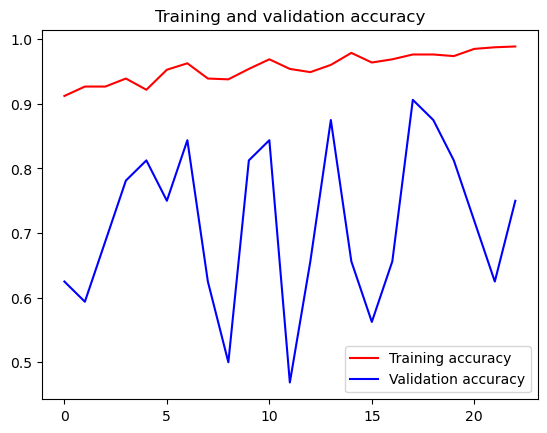

In [23]:
"""Funciones para graficar los history de validacion y el accuracy"""
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.savefig("Training and validation accuracy - CNN-based TL.png")
plt.show()

In [24]:
"""Predicción del Modelo"""
y_pred = model.predict(x_test)

7/7 [==============================] - 9s 1s/step


In [25]:
"""Mostrar el array del y_pred"""
y_pred.round()

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [26]:
"""Visualizar las métricas del modelo"""
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_pred.round(), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       0.95      1.00      0.97        37
           2       0.73      0.96      0.83        28
           3       0.73      0.73      0.73        33
           4       0.90      0.50      0.64        36
           5       0.97      0.71      0.82        41
           6       0.47      1.00      0.64        17

   micro avg       0.81      0.82      0.81       221
   macro avg       0.82      0.84      0.80       221
weighted avg       0.85      0.82      0.81       221
 samples avg       0.81      0.81      0.81       221



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
"""Visualización del Accuracy"""
accuracy = model.evaluate(x_test,y_test,batch_size=32)
print("Accuracy: ",accuracy[1]*100)

7/7 [==============================] - 9s 1s/step - loss: 0.7694 - acc: 0.8125
Accuracy:  81.25


In [28]:
Y_pred_classes = np.argmax(y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 

In [29]:
"""Reporte de clasificación de las métricas"""
report = classification_report(Y_true, Y_pred_classes, target_names=categories)
print(report)

              precision    recall  f1-score   support

      FASE 0       1.00      1.00      1.00        29
      FASE 1       1.00      0.95      0.97        39
      FASE 2       0.97      0.76      0.85        37
      FASE 3       0.73      0.73      0.73        33
      FASE 4       0.47      0.90      0.62        20
      FASE 5       0.71      0.97      0.82        30
      FASE 6       1.00      0.47      0.64        36

    accuracy                           0.81       224
   macro avg       0.84      0.82      0.80       224
weighted avg       0.87      0.81      0.81       224



 <h1><center> <font color='red'>Matriz de Confusión</font></center></h1> 

In [30]:
"""Estructurar la matriz de confusion"""
confusion = confusion_matrix(Y_true,Y_pred_classes)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[29  0  0  0  0  0  0]
 [ 0 37  0  2  0  0  0]
 [ 0  0 28  6  2  1  0]
 [ 0  0  1 24  7  1  0]
 [ 0  0  0  0 18  2  0]
 [ 0  0  0  0  1 29  0]
 [ 0  0  0  1 10  8 17]]


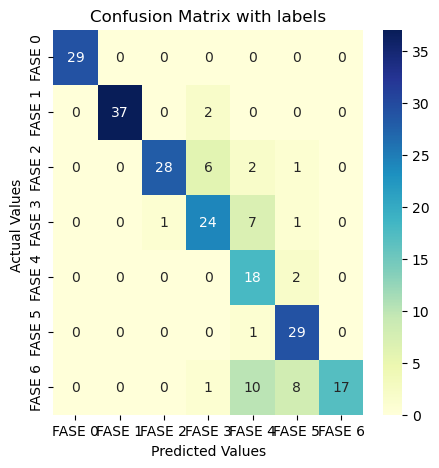

In [31]:
"""Librería para graficar la matriz de confusion"""
import seaborn as sns
plt.figure(figsize=(5, 5))

ma = sns.heatmap(confusion, cmap="YlGnBu", annot=True)
ma.set_title('Confusion Matrix with labels')
ma.set_xlabel('Predicted Values')
ma.set_ylabel('Actual Values ')
ma.xaxis.set_ticklabels(categories)
ma.yaxis.set_ticklabels(categories)

plt.show()

In [32]:
"""Crear un archivo de tipo json"""
model_json = model.to_json()
with open("CNN_TL_InceptionV3_Vocales_Classifier.json", "w") as json_file:
    json_file.write(model_json)
model.save("CNN_TL_InceptionV3_Vocales_Classifier.h5")
"""Guardar en el disco duro"""
print("Saved model to disk")
model.save_weights("CNN_TL_InceptionV3_Vocales.h5")

Saved model to disk
